In [1]:
import sys
sys.path.append("../../")

from astronn import datasets
from astronn import models

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import glob
from scipy.signal import find_peaks, peak_widths

import tensorflow as tf
from tensorflow import keras

Using TensorFlow backend.


### Load DS and Bedding star data

In [2]:
df_ds = datasets.deltascuti()
df_binaries = df_ds.load("../../astronn/data/deltascuti/preprocessed/*", batch_size=1)
bedding_stars = datasets.bedding()
df_bedding = bedding_stars.load("../data/bedding/preprocessed/*", batch_size=1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Constant'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the ver

In [3]:
def get_peak_width(position, peaks, peaks_width, peaks_sorted_by_prob):
    """
    """
    peak_id = np.where(probs == peaks_sorted_by_prob[position])[0][0]
    return (peak_id, peaks_width[0][np.where(peaks == peak_id)[0][0]])

In [4]:
star_results = {}
model_files = glob.glob("/tmp/loop/*")
for model_file in model_files:
    print("Loading model %s" % model_file)
    sepconv_mod = tf.keras.models.load_model(model_file)

    error = []
    for star in df_binaries.take(11):
        # Get star info from dataset
        star_id = star[0].numpy()[0].decode("utf-8")
        if star_id not in star_results:
            star_results[star_id] = {"top1":[], "top2":[], "top3":[], 
            "target":np.where(star[2].numpy().flat == 1)[0].flat[0]}
        
        # Calculate peaks and widths
        probs = sepconv_mod.predict_proba(star[1])[0]
        peaks, peaks_prop = find_peaks(probs, height=0, distance=10)
        peaks_width = peak_widths(probs, peaks)
        peaks_sorted_by_prob = np.sort(probs[peaks])[::-1]

        best_peak, best_peak_width = get_peak_width(0, peaks, peaks_width, peaks_sorted_by_prob)
        star_results[star_id]["top1"].append(best_peak)
        best_peak, best_peak_width = get_peak_width(1, peaks, peaks_width, peaks_sorted_by_prob)
        star_results[star_id]["top2"].append(best_peak)
        best_peak, best_peak_width = get_peak_width(2, peaks, peaks_width, peaks_sorted_by_prob)
        star_results[star_id]["top3"].append(best_peak)

    for star in  df_bedding.take(57):
        # Get star info from dataset
        star_id = star[0].numpy()[0].decode("utf-8")
        if star_id not in star_results:
            star_results[star_id] = {"top1":[], "top2":[], "top3":[], 
            "target":np.where(star[2].numpy().flat == 1)[0].flat[0] / 0.0864}
        
        # Calculate peaks and widths
        probs = sepconv_mod.predict_proba(star[1])[0]
        peaks, peaks_prop = find_peaks(probs, height=0, distance=10)
        peaks_width = peak_widths(probs, peaks)
        peaks_sorted_by_prob = np.sort(probs[peaks])[::-1]

        best_peak, best_peak_width = get_peak_width(0, peaks, peaks_width, peaks_sorted_by_prob)
        star_results[star_id]["top1"].append(best_peak)
        best_peak, best_peak_width = get_peak_width(1, peaks, peaks_width, peaks_sorted_by_prob)
        star_results[star_id]["top2"].append(best_peak)
        best_peak, best_peak_width = get_peak_width(2, peaks, peaks_width, peaks_sorted_by_prob)
        star_results[star_id]["top3"].append(best_peak)

Loading model /tmp/loop/sepconvnn_tmp_2
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Loading model /tmp/loop/sepconvnn_tmp_8
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do

In [5]:
x = [] 
y = []
dnu = []
col = []
for key in star_results.keys():
    for val in star_results[key]["top1"]:
        x.append(key)
        y.append(val)
        dnu.append(star_results[key]["target"])
        col.append("blue")
    for val in star_results[key]["top2"]:
        x.append(key)
        y.append(val)
        dnu.append(star_results[key]["target"])
        col.append("green")
    for val in star_results[key]["top3"]:
        x.append(key)
        y.append(val)
        dnu.append(star_results[key]["target"])
        col.append("orange")

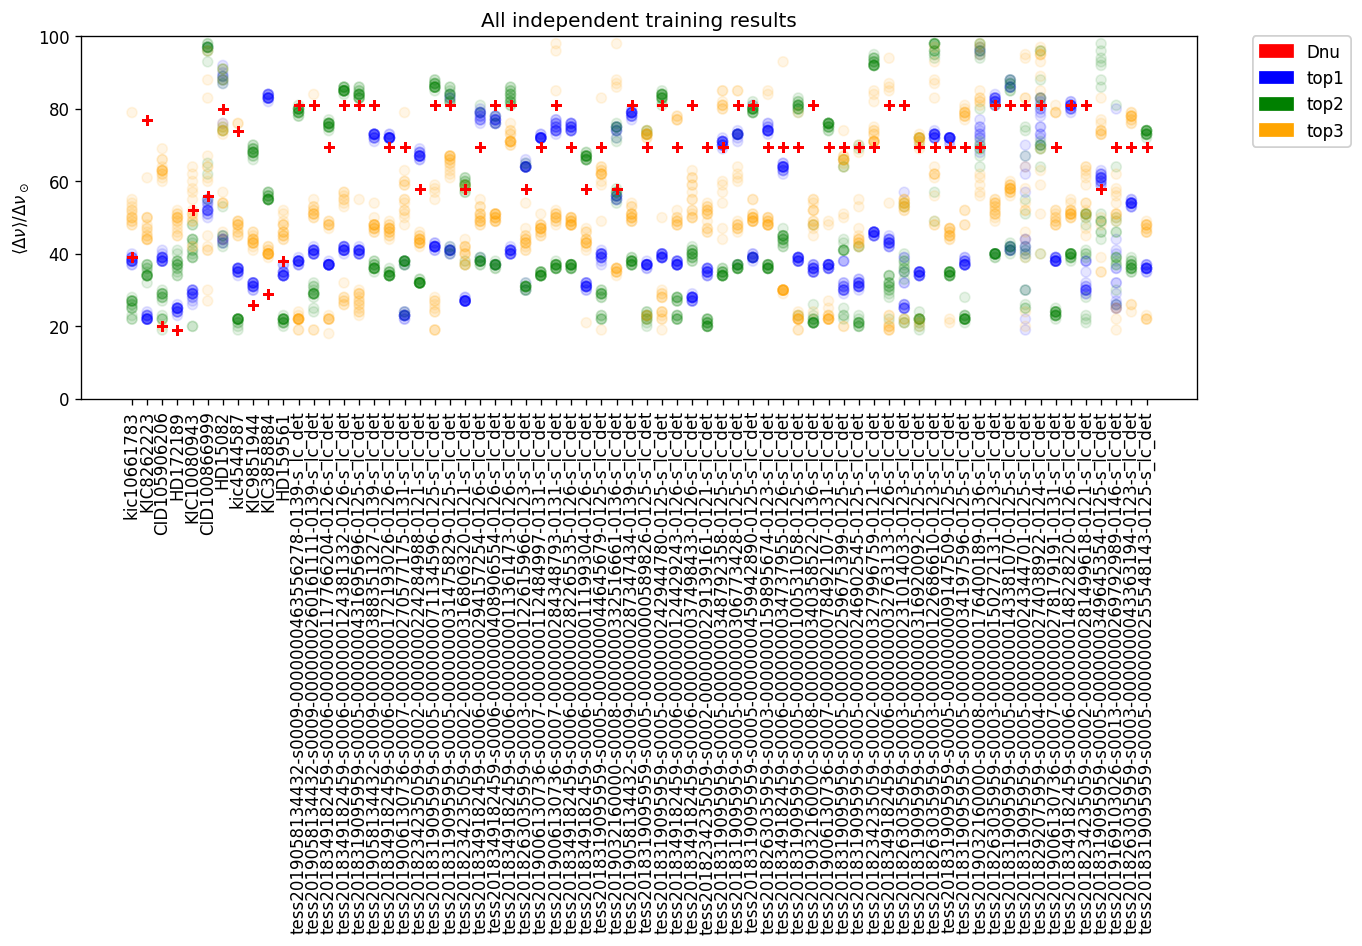

In [6]:
import matplotlib.patches as mpatches

plt.subplots(1, figsize=(12, 4), dpi=120)
plt.scatter(x, y, alpha=0.1, color=col)
plt.scatter(x, dnu,  color="red", marker="+")
plt.xticks(rotation=90)
plt.ylabel("$\langle\Delta\\nu\\rangle / \Delta\\nu_\odot$")
plt.title("All independent training results")
plt.ylim(0, 100)
legend = plt.legend(handles=[mpatches.Patch(color='red', label='Dnu'), 
                    mpatches.Patch(color='blue', label='top1'),
                    mpatches.Patch(color='green', label='top2'),
                    mpatches.Patch(color='orange', label='top3')],
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    borderaxespad=0.0
)
plt.gca().add_artist(legend)
plt.show()